# Project 5: Identifying High Risk Areas from NYC Traffic Conditions
## *EDA: Number of Crashes*

### Table of Contents

* [Topic 1](#topic-1)
* [Topic 2](#topic-2)

#### Import Libraries & Read in Data

In [16]:
## standard imports 
import pandas as pd 
import numpy as np

## visualizations
import matplotlib.pyplot as plt
import seaborn as sns

## options
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 100
pd.set_option('max_colwidth', 100)

In [10]:
### read in data
crashes = pd.read_csv('../data/crashes_lincoln_tunnel.csv')

In [25]:
crashes.head(2)

,DATE,CRASH DATE,CRASH TIME,LATITUDE,LONGITUDE,LOCATION,BOROUGH,ZIP CODE,CONTRIBUTING FACTOR VEHICLE 1,geometry
0,2019-01-01 02:30:00,01/01/2019,2:30,40.749706,-73.991570,"(40.749706, -73.99157)",MANHATTAN,10001.0,Passing or Lane Usage Improper,POINT (-73.99157 40.749706)
1,2019-01-01 04:23:00,01/01/2019,4:23,40.761500,-73.997826,"(40.7615, -73.997826)",NaN,NaN,Driver Inattention/Distraction,POINT (-73.997826 40.7615)


## Topic 1 <a class="anchor" id="topic-1"></a>
<hr/>

In [12]:
contributing_factor_1 = crashes['CONTRIBUTING FACTOR VEHICLE 1'].unique()
len(contributing_factor_1)

36

There are 35 unique factors that are listed as contributing factors for vehicle 1.

In [15]:
crash_factors = crashes.groupby(by='CONTRIBUTING FACTOR VEHICLE 1').count()[['LOCATION']]

crash_factors.sort_values(by='LOCATION',ascending=False,inplace=True)

crash_factors.rename(columns={'LOCATION':'TOTAL CRASHES'},inplace=True)

crash_factors.head()

,TOTAL CRASHES
CONTRIBUTING FACTOR VEHICLE 1,
Driver Inattention/Distraction,614
Unspecified,430
Passing or Lane Usage Improper,278
Following Too Closely,217
Passing Too Closely,208


## Crash Factors for Lincoln Tunnel <a class="anchor" id="topic-2"></a>
<hr/>

In [18]:
top_10_factors = crash_factors.head(10)
top_10_factors

,TOTAL CRASHES
CONTRIBUTING FACTOR VEHICLE 1,
Driver Inattention/Distraction,614
Unspecified,430
Passing or Lane Usage Improper,278
Following Too Closely,217
Passing Too Closely,208
Unsafe Lane Changing,183
Failure to Yield Right-of-Way,148
Turning Improperly,134
Backing Unsafely,71


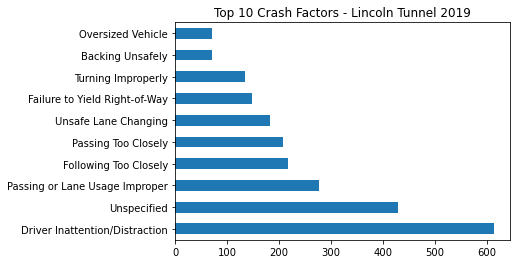

In [24]:
top_10_factors.plot(kind='barh', legend=None)
plt.ylabel('')
plt.title('Top 10 Crash Factors - Lincoln Tunnel 2019')
plt.savefig('../images/top_contributing_factors_lincoln_tunnel.png',bbox_inches='tight')